In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Define a plotting style to be used for all plots in this notebook
plt.style.use('tableau-colorblind10')

In [3]:
df_client_train = pd.read_csv('data/train/client_train.csv')
df_invoice_train = pd.read_csv('data/train/invoice_train.csv')

In [4]:
display(df_invoice_train.info(),df_invoice_train.describe(),df_invoice_train.shape,df_invoice_train.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


None

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000
mean,20.128,123058699065.183,172.488,7.322,1.003,410.979,109.322,20.306,52.926,17766.998,18349.705,44.831
std,13.473,1657267274261.927,133.887,1.572,0.308,757.308,1220.123,157.424,875.472,40366.926,40953.206,3128.335
min,8.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,11.000,121108.000,5.000,6.000,1.000,79.000,0.000,0.000,0.000,1791.000,2056.000,4.000
50%,11.000,494561.000,203.000,8.000,1.000,274.000,0.000,0.000,0.000,7690.000,8192.000,4.000
75%,40.000,1115161.000,207.000,9.000,1.000,600.000,0.000,0.000,0.000,21660.000,22343.000,4.000
max,45.000,27981145458733.000,600.000,413.000,50.000,999910.000,999073.000,64492.000,547946.000,2800280.000,2870972.000,636624.000


(4476749, 16)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
5,train_Client_0,2017-07-17,11,1335667,0,207,9,1,314,0,0,0,15638,15952,8,ELEC
6,train_Client_0,2018-12-07,11,1335667,0,207,9,1,541,0,0,0,15952,16493,12,ELEC
7,train_Client_0,2019-03-19,11,1335667,0,207,9,1,585,0,0,0,16493,17078,8,ELEC
8,train_Client_0,2011-07-22,11,1335667,0,203,9,1,1200,186,0,0,7770,9156,4,ELEC
9,train_Client_0,2011-11-22,11,1335667,0,203,6,1,1082,0,0,0,9156,10238,4,ELEC


In [5]:
df_invoice_train.counter_number.nunique()

201893

In [6]:
# find client with most invoices

df_invoice_train['client_id'].value_counts().head(20)

client_id
train_Client_116878    439
train_Client_9263      380
train_Client_130245    327
train_Client_59131     317
train_Client_61728     310
train_Client_56894     309
train_Client_50639     308
train_Client_4207      307
train_Client_107082    298
train_Client_23141     296
train_Client_21518     293
train_Client_17705     284
train_Client_119751    281
train_Client_103744    280
train_Client_64678     275
train_Client_26663     275
train_Client_84957     275
train_Client_79926     274
train_Client_14725     272
train_Client_42602     272
Name: count, dtype: int64

In [7]:
# convert invoice_date to datetime format
df_invoice_train['invoice_date'] = pd.to_datetime(df_invoice_train['invoice_date'])

In [8]:
# join both datasets by client_id
df_combined = pd.merge(df_client_train, df_invoice_train, on='client_id', how='inner')
df_combined.head(30)

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.000,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.000,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.000,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.000,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.000,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC
5,60,train_Client_0,11,101,31/12/1994,0.000,2017-07-17,11,1335667,0,...,9,1,314,0,0,0,15638,15952,8,ELEC
6,60,train_Client_0,11,101,31/12/1994,0.000,2018-12-07,11,1335667,0,...,9,1,541,0,0,0,15952,16493,12,ELEC
7,60,train_Client_0,11,101,31/12/1994,0.000,2019-03-19,11,1335667,0,...,9,1,585,0,0,0,16493,17078,8,ELEC
8,60,train_Client_0,11,101,31/12/1994,0.000,2011-07-22,11,1335667,0,...,9,1,1200,186,0,0,7770,9156,4,ELEC
9,60,train_Client_0,11,101,31/12/1994,0.000,2011-11-22,11,1335667,0,...,6,1,1082,0,0,0,9156,10238,4,ELEC


In [9]:
#Getting unique values on the invoice train data
for col in df_combined.columns:
    print(f"{col} - {df_combined[col].nunique()}")

disrict - 4
client_id - 135493
client_catg - 3
region - 25
creation_date - 8088
target - 2
invoice_date - 8275
tarif_type - 17
counter_number - 201893
counter_statue - 16
counter_code - 42
reading_remarque - 8
counter_coefficient - 16
consommation_level_1 - 8295
consommation_level_2 - 12576
consommation_level_3 - 2253
consommation_level_4 - 12075
old_index - 155648
new_index - 157980
months_number - 1370
counter_type - 2


In [10]:
df_combined.isnull().sum()

disrict                 0
client_id               0
client_catg             0
region                  0
creation_date           0
target                  0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

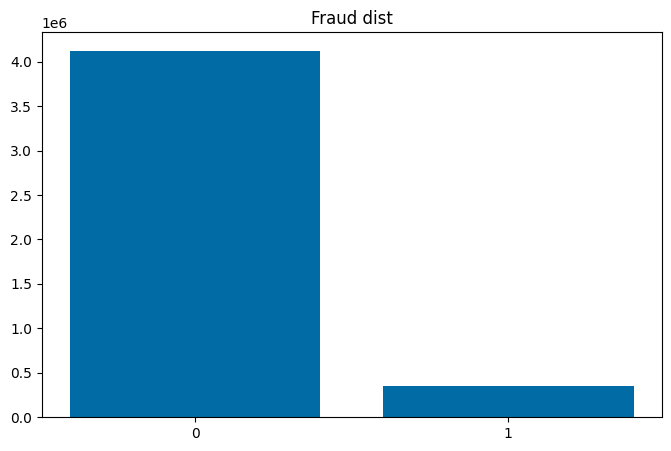

In [11]:
#Plot fraud vs non-fraud
frauds = df_combined.groupby(['target'])['client_id'].count()
plt.bar(x=frauds.index, height=frauds.values, tick_label = [0,1])
plt.title('Fraud dist')
plt.show()

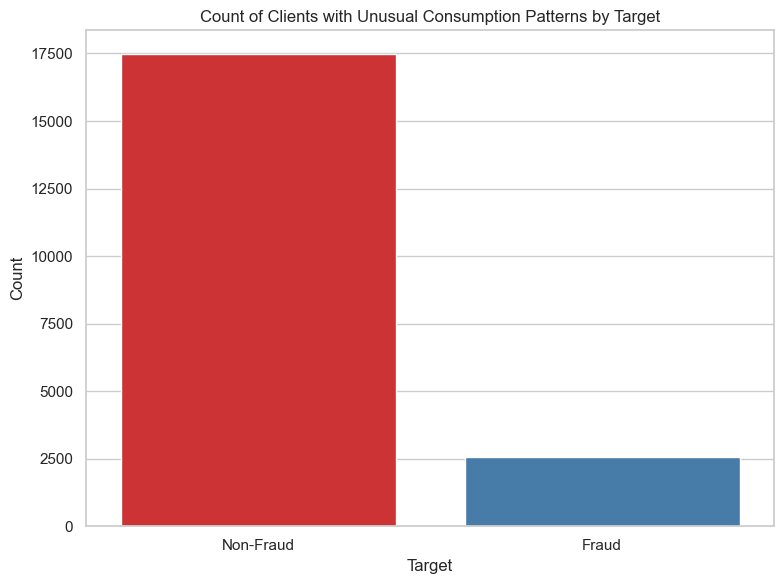

In [31]:
# Unusual Consumption Patterns

# Calculate z-score for consumption levels
df_combined['z_score_consommation'] = (df_combined['consommation_level_1'] - df_combined['consommation_level_1'].mean()) / df_combined['consommation_level_1'].std()

# Identify clients with unusual consumption patterns
unusual_consumers = df_combined[df_combined['z_score_consommation'] > 3]  # Adjust threshold as needed

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=unusual_consumers, x='target', palette='Set1')

# Set labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of Clients with Unusual Consumption Patterns by Target')

# Show plot
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()



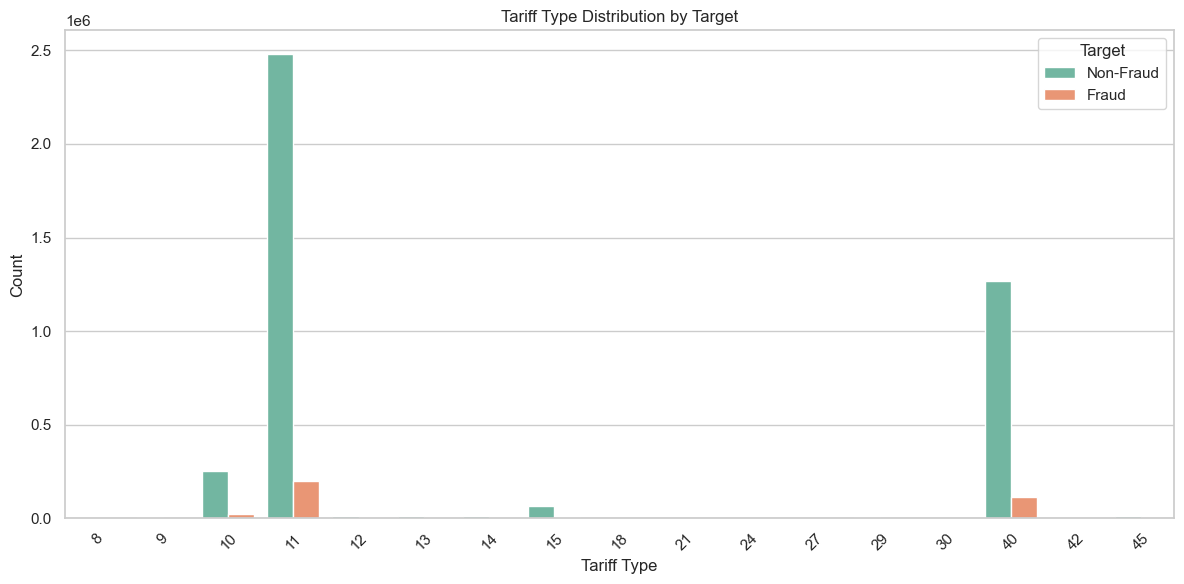

In [13]:
# Inconsistent Tariff Types

# Analyze distribution of tariff types
tariff_type_distribution = df_combined['tarif_type'].value_counts()

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a stacked bar plot for tarif_type distribution by target
plt.figure(figsize=(12, 6))
sns.countplot(data=df_combined, x='tarif_type', hue='target', palette="Set2")
plt.xlabel('Tariff Type')
plt.ylabel('Count')
plt.title('Tariff Type Distribution by Target')

# Show plot
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

         disrict            client_id  client_catg  region creation_date   
1120          60  train_Client_100024           11     101    22/03/1985  \
2818          63   train_Client_10008           11     101    14/09/1987   
5257          69  train_Client_100144           11     104    28/02/2001   
5751          60  train_Client_100157           11     101    11/07/2011   
9097          60  train_Client_100257           11     101    01/10/2007   
...          ...                  ...          ...     ...           ...   
4458606       69   train_Client_99506           11     104    08/09/1998   
4461423       62   train_Client_99580           12     309    19/06/1990   
4461805       60    train_Client_9959           11     101    14/05/1981   
4466699       69   train_Client_99733           11     104    20/01/1986   
4476318       60   train_Client_99985           51     101    31/12/1994   

         target invoice_date  tarif_type  counter_number counter_statue  ...   
1120   

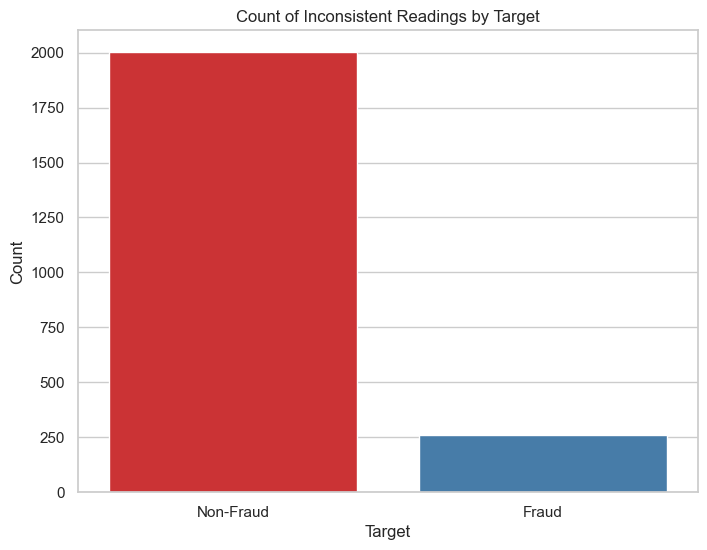

In [23]:
# Inconsistent Counter Readings
# not good for fraud detection

# Check for cases where new index is lower than old index
inconsistent_readings = df_combined[df_combined['new_index'] < df_combined['old_index']]

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=inconsistent_readings, x='target', palette='Set1')

# Set labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of Inconsistent Readings by Target')

# Show plot
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.show()

In [15]:
# Identify clients with unusual counter statuses
df_combined['counter_statue'].unique()

array([0, 1, 5, 4, 3, 2, 769, '0', '5', '1', '4', 'A', 618, 269375, 46,
       420], dtype=object)

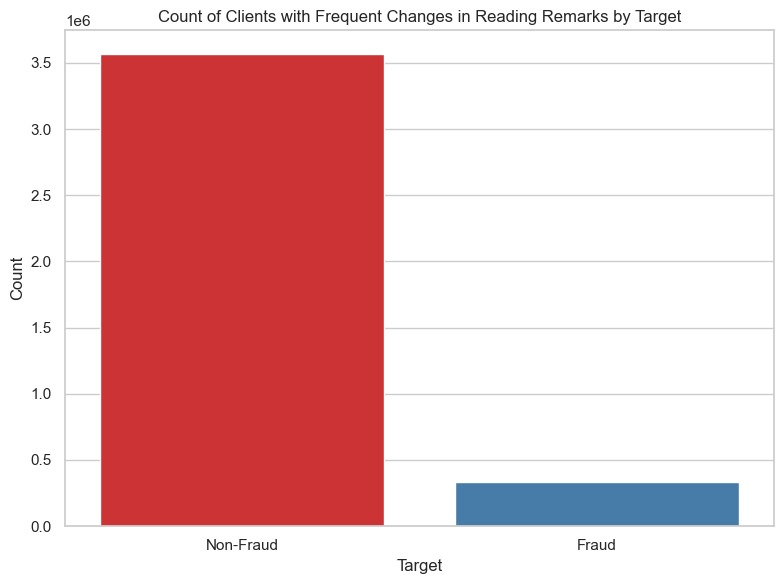

In [26]:
# Multiple Reading Remarks

# Count occurrences of reading remarks per client
reading_remarks_counts = df_combined['reading_remarque'].groupby(df_combined['client_id']).nunique()

# Identify clients with frequent changes in reading remarks
multiple_remarks_clients = reading_remarks_counts[reading_remarks_counts >= 2]  # Set threshold as needed

# Merge with the target variable
merged_data = pd.merge(multiple_remarks_clients, df_combined[['client_id', 'target']], left_index=True, right_on='client_id', how='left')

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_data, x='target', palette='Set1')

# Set labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of Clients with Frequent Changes in Reading Remarks by Target')

# Show plot
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()


In [17]:
# Unusual Counter Types

# Analyze distribution of counter types
counter_type_distribution = df_combined['counter_type'].value_counts()
print(counter_type_distribution)

counter_type
ELEC    3079406
GAZ     1397343
Name: count, dtype: int64


In [18]:
# Inconsistent Tariff Types

# Analyze distribution of tariff types
tariff_type_distribution = df_combined['tarif_type'].value_counts()
print(tariff_type_distribution)


tarif_type
11    2679872
40    1379755
10     276210
15      72422
45      17552
13      11656
14      11611
12      11345
29      10090
9        6039
21        104
8          43
30         35
24          9
18          4
42          1
27          1
Name: count, dtype: int64


In [19]:
# Unusual Consumption Coefficients

# Identify clients with high consumption coefficients
high_coefficient_clients = df_combined[df_combined['counter_coefficient'] > df_combined['counter_coefficient'].mean()]
# min = 1, max = 50




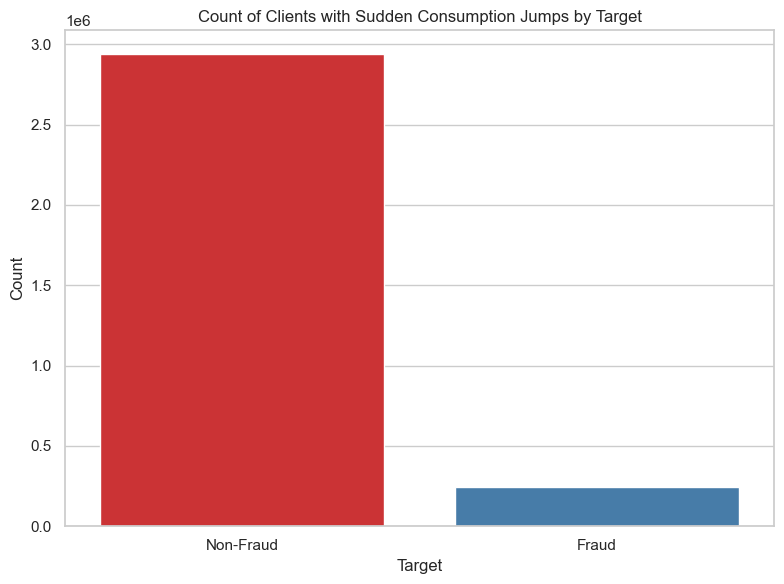

In [28]:
# Sudden Consumption Jumps

# Calculate difference between old and new index
df_combined['index_diff'] = df_combined['new_index'] - df_combined['old_index']

# Identify clients with sudden consumption jumps
sudden_jump_clients = df_combined[df_combined['index_diff'] > df_combined['index_diff'].mean()]  # Set threshold as needed

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=sudden_jump_clients, x='target', palette='Set1')

# Set labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of Clients with Sudden Consumption Jumps by Target')

# Show plot
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

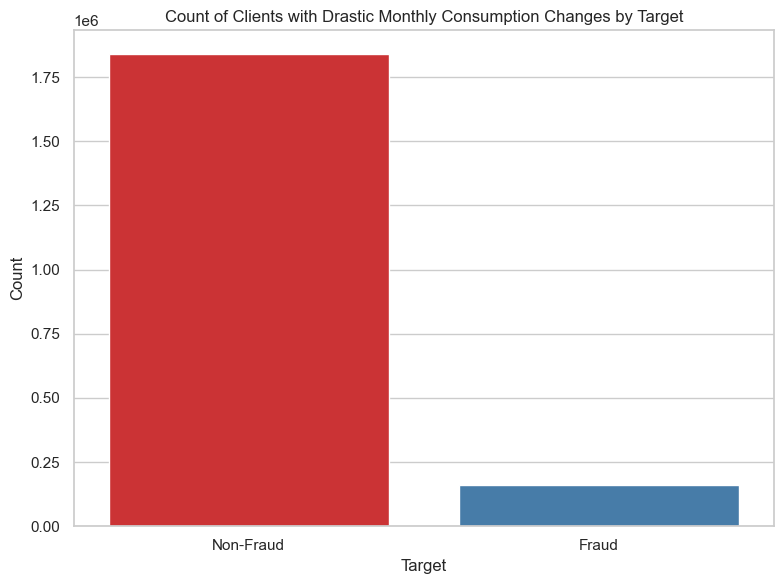

In [29]:
# Month-to-Month Changes in Consumption

# Calculate month-to-month change in consumption
df_combined['monthly_change'] = df_combined.groupby('client_id')['consommation_level_1'].diff()

# Identify clients with drastic monthly consumption changes
drastic_change_clients = df_combined[df_combined['monthly_change'] > df_combined['monthly_change'].mean()]

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=drastic_change_clients, x='target', palette='Set1')

# Set labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of Clients with Drastic Monthly Consumption Changes by Target')

# Show plot
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()


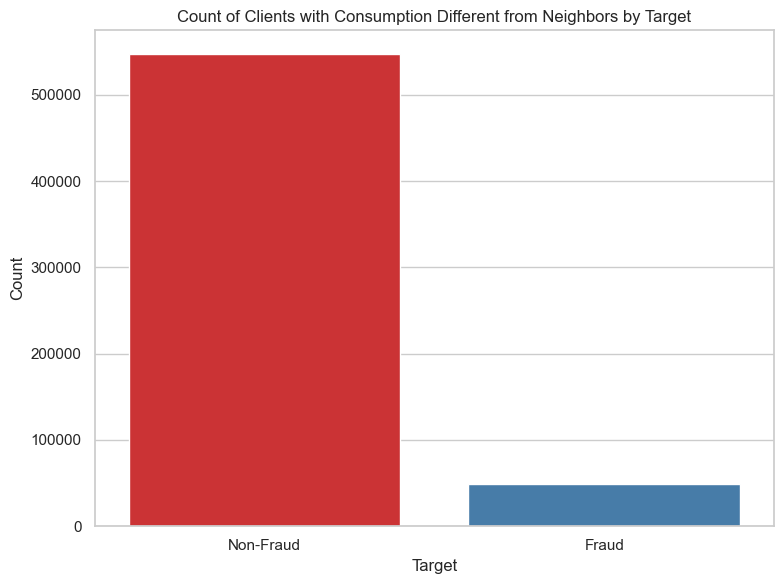

In [30]:
# Comparison with Neighbors

# Calculate average consumption for neighboring clients
df_combined['neighbor_avg_consommation'] = df_combined.groupby('region')['consommation_level_1'].transform('mean')

# Identify clients with consumption significantly different from neighbors
outlier_clients = df_combined[abs(df_combined['consommation_level_1'] - df_combined['neighbor_avg_consommation']) > df_combined['neighbor_avg_consommation']]  # Set threshold as needed

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=outlier_clients, x='target', palette='Set1')

# Set labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of Clients with Consumption Different from Neighbors by Target')

# Show plot
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()